In [6]:
# import neccessary library
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# load and read the dataset
df = pd.read_csv(r'C:\Users\ifyp4\Downloads\Unicorn_Companies.csv')
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [11]:
df.tail()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."
1073,Zwift,$1B,2020-09-16,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,$620M,"Novator Partners, True, Causeway Media Partners"


In [83]:
df.shape

(1074, 10)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [85]:
# To check missing values
df.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

### Data Inspection, Cleaning and Manipulation¶
Data validation to put the data in the right data times

In [86]:
# Define a function to convert M and B to millionsand Billions, respectively
def convert_to_number(x):
    if x[-1] == 'M':
        return float(x[:-1])* 1e6
    elif x[-1] == 'B':
        return float(x[:-1])* 1e9
    else:
        return x
    
# convert the valuation column to float
df['Valuation'] = df['Valuation'].astype(str).str.replace('$', '').apply(convert_to_number).astype(float)

# convert the funding column to float
df['Funding'] = df['Funding'].replace('unknown', '0').str.replace('$', '').str.replace('M', '000000').str.replace('B', '000000000').replace('Unknown', '0').apply(convert_to_number).astype(float)

# print the updated DataFrame
df.head()


C:\Users\ifyp4\AppData\Local\Temp\ipykernel_1948\3345912536.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Valuation'] = df['Valuation'].astype(str).str.replace('$', '').apply(convert_to_number).astype(float)
C:\Users\ifyp4\AppData\Local\Temp\ipykernel_1948\3345912536.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Funding'] = df['Funding'].replace('unknown', '0').str.replace('$', '').str.replace('M', '000000').str.replace('B', '000000000').replace('Unknown', '0').apply(convert_to_number).astype(float)


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."


In [8]:
df.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [9]:
# convert the Date Joined to datetime

df['Date Joined'] = pd.to_datetime(df['Date Joined'])

# convert the Year Founded to datetime
df['Year Founded'] = pd.to_datetime(df['Year Founded'], format = '%Y')

In [10]:
df.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country                     object
Continent                   object
Year Founded        datetime64[ns]
Funding                     object
Select Investors            object
dtype: object

In [91]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."


In [17]:
# Calculate the age of the company at the time it joined the unicorn companies. This will add a new column(Age Joining) to the DataFrame
df['Age of Joining'] = ((df['Date Joined'] - df['Year Founded']).dt.days / 365).round(1)

# print the updated DataFrame
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of Joining
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5.3
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,$2B,"Tiger Global Management, Sequoia Capital China...",10.5
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4.1
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,$4B,"Institutional Venture Partners, Sequoia Capita...",6.9


In [92]:
# apply the ffil method to the 'CITY' and 'SELECT INVESTMENT' columns
df['City'] = df['City'].ffill()
df['Select Investors'] = df['Select Investors'].ffill()

# print the updated DataFrame
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."


In [93]:
df.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

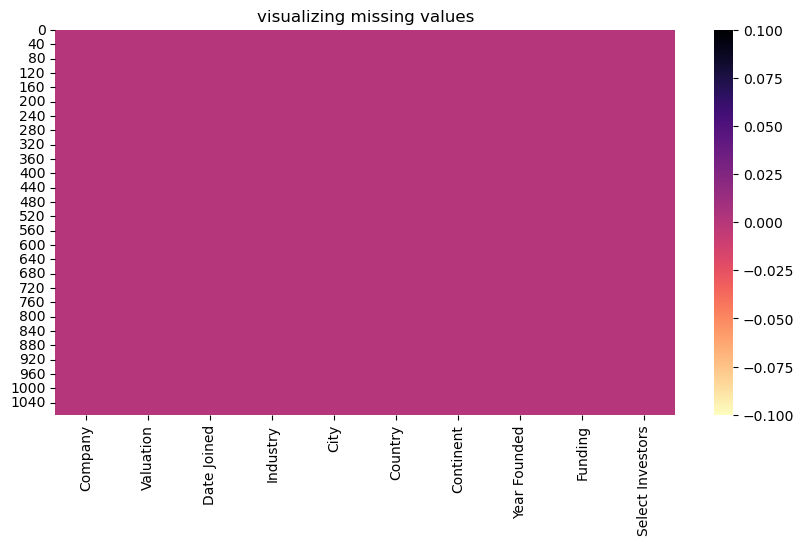

In [56]:
# visualize the missing values
plt.figure(figsize = (10,5))
plt.title('visualizing missing values')
sns.heatmap(df.isnull(), cbar = True, cmap = 'magma_r')
plt.show()

## Exploratory Data Analysis: Relationships, insights and visualization
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

### Univariate Analysis

In [94]:
df.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

In [95]:
# Industry count per company
Ind_count = df['Industry'].value_counts().sort_values(ascending = True)
Ind_count

Artificial Intelligence                 11
Travel                                  14
Consumer & retail                       25
Edtech                                  28
Auto & transportation                   31
Hardware                                34
Mobile & telecommunications             38
Data management & analytics             41
Cybersecurity                           50
Supply chain, logistics, & delivery     57
Other                                   58
Artificial intelligence                 73
Health                                  74
E-commerce & direct-to-consumer        111
Internet software & services           205
Fintech                                224
Name: Industry, dtype: int64

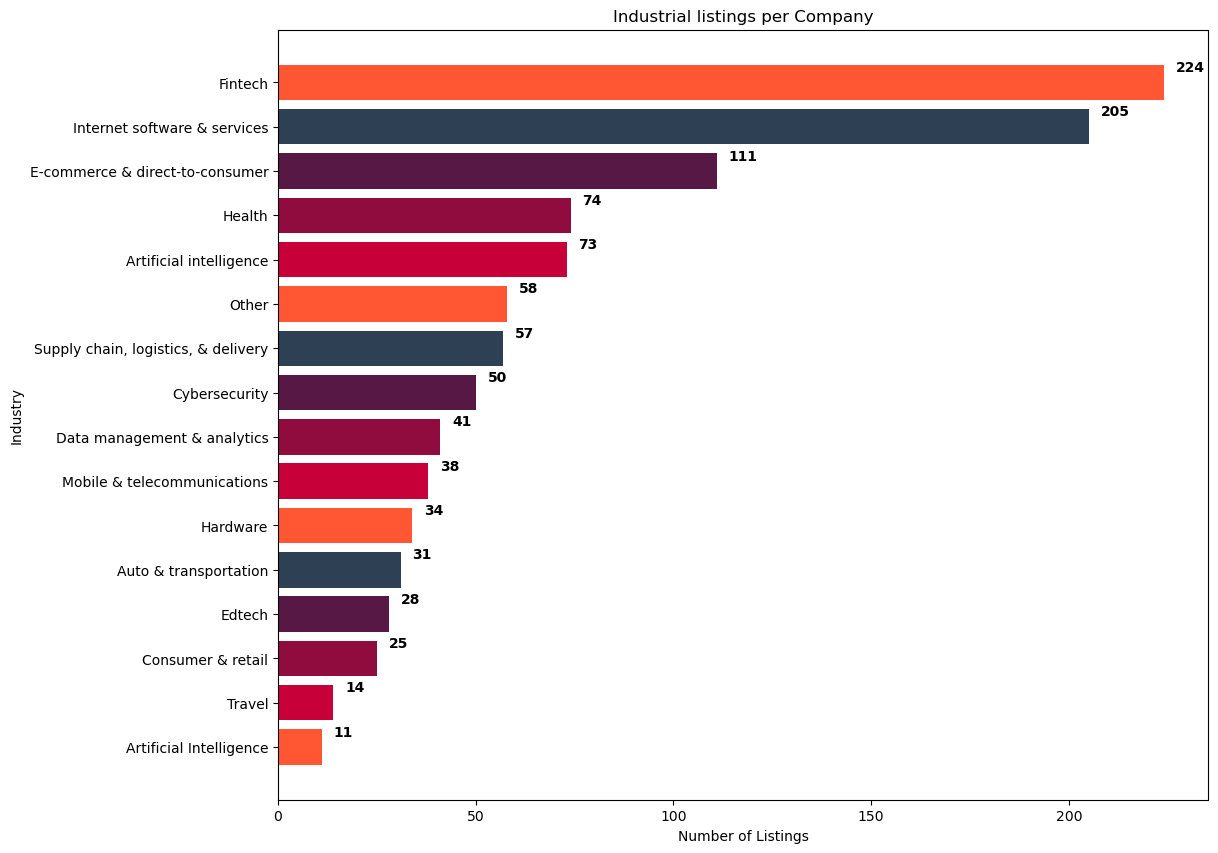

In [59]:
# set the figure size
plt.figure(figsize=(12, 10))

# create a horizontal bar char
plt.barh(Ind_count.index, Ind_count.values, color=['#FF5733', '#C70039', '#900C3F', '#581845', '#2E4053'])

# Add data labels to the chart
for i, v in enumerate(Ind_count.values):
    plt.text(v + 3, i + .25, str(v), color = 'black', fontweight = 'bold')

# Set the title and axis labels
plt.title('Industrial listings per Company')
plt.xlabel('Number of Listings')
plt.ylabel('Industry')

# Display the chart
plt.show()

# Observation
Fintech had the highest number of listings with a value of 224, while Artificial Intelligence had the lowest with only 11. This is not unexpected given the widespread use and demand for financial technology companies in today's economy. On the other hand, the field of Artificial Intelligence is still growing and gradually gaining momentum. However, if more people become knowledgeable about AI and its potential applications, it could be integrated into Fintech to enhance safety and security in business technology.

### Bivariate Analysis

In [60]:
df.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

In [61]:
# distribution of Valuation by Country
df.groupby('Country')['Valuation'].value_counts().astype('string').sort_values(ascending = True)

Country        Valuation   
Argentina      2.000000e+09    1
Singapore      4.000000e+09    1
Senegal        2.000000e+09    1
Philippines    2.000000e+09    1
               1.000000e+09    1
                              ..
France         2.000000e+09    7
China          5.000000e+09    8
United States  8.000000e+09    8
India          2.000000e+09    9
Canada         1.000000e+09    9
Name: Valuation, Length: 176, dtype: string

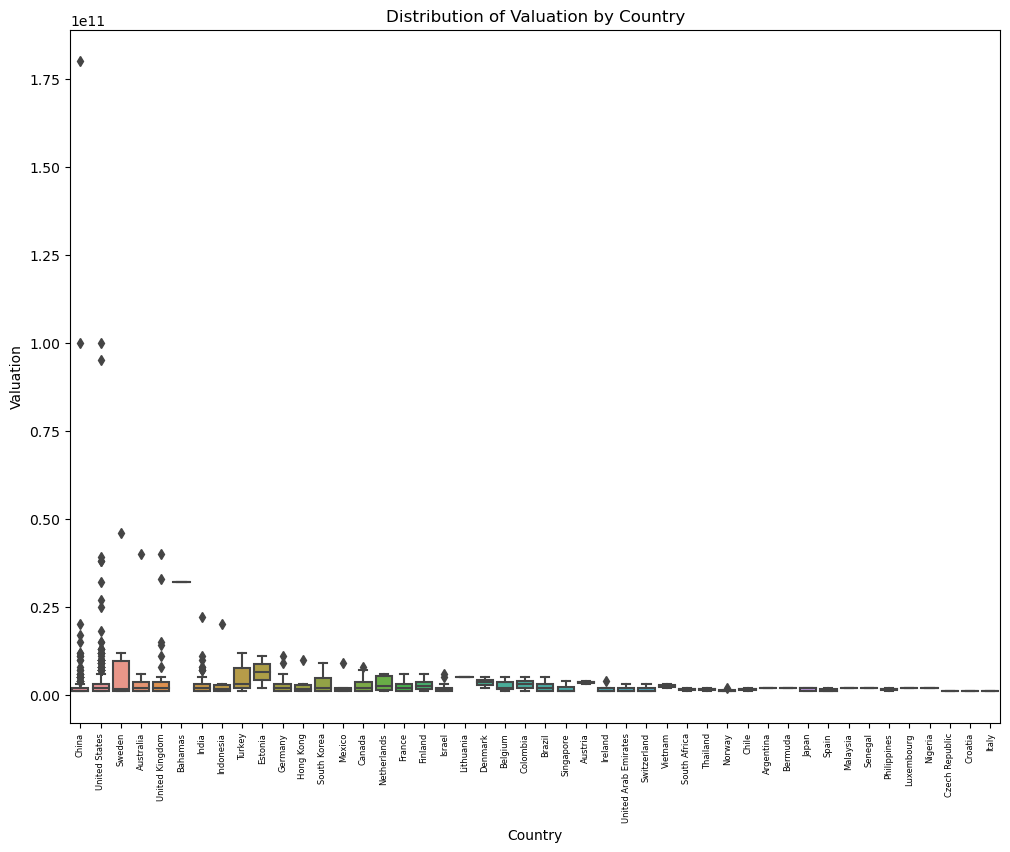

In [62]:
# visualizing of Valuation by Country
plt.figure(figsize = (12,9))
sns.boxplot(x = df['Country'], y = df['Valuation'], data = df)
plt.title('Distribution of Valuation by Country')
plt.xticks(rotation = 90, fontsize=6)
plt.show()

# Observation
The boxplot shows that the largest box and longer whiskers indicate a wider range of valuations, with a median value of approximately 0.001 billion. Additionally, the boxplot can provide insights into the skewness of the valuation distribution. In this case, the median closer to the lower end of the box suggests a left-skewed distribution, indicating a higher concentration of lower valuations. Conversely, a median closer to the upper end of the box suggests a right-skewed distribution, indicating a higher concentration of higher valuations. Overall, this visualization is useful for understanding the distribution and variability of valuations across different countries. It allows for easy comparisons and identification of potential outliers or interesting patterns within the data.

In [63]:
# distribution of Valuation by Country
df.groupby('Industry')['Funding'].value_counts().astype('string').sort_values(ascending = True)

Industry                      Funding     
Fintech                       5.460000e+08    1
Health                        5.240000e+08    1
                              5.680000e+08    1
                              5.690000e+08    1
                              5.700000e+08    1
                                             ..
Internet software & services  2.000000e+08    6
Health                        1.000000e+09    6
Auto & transportation         1.000000e+09    7
Internet software & services  1.000000e+09    7
Fintech                       2.000000e+09    8
Name: Funding, Length: 918, dtype: string

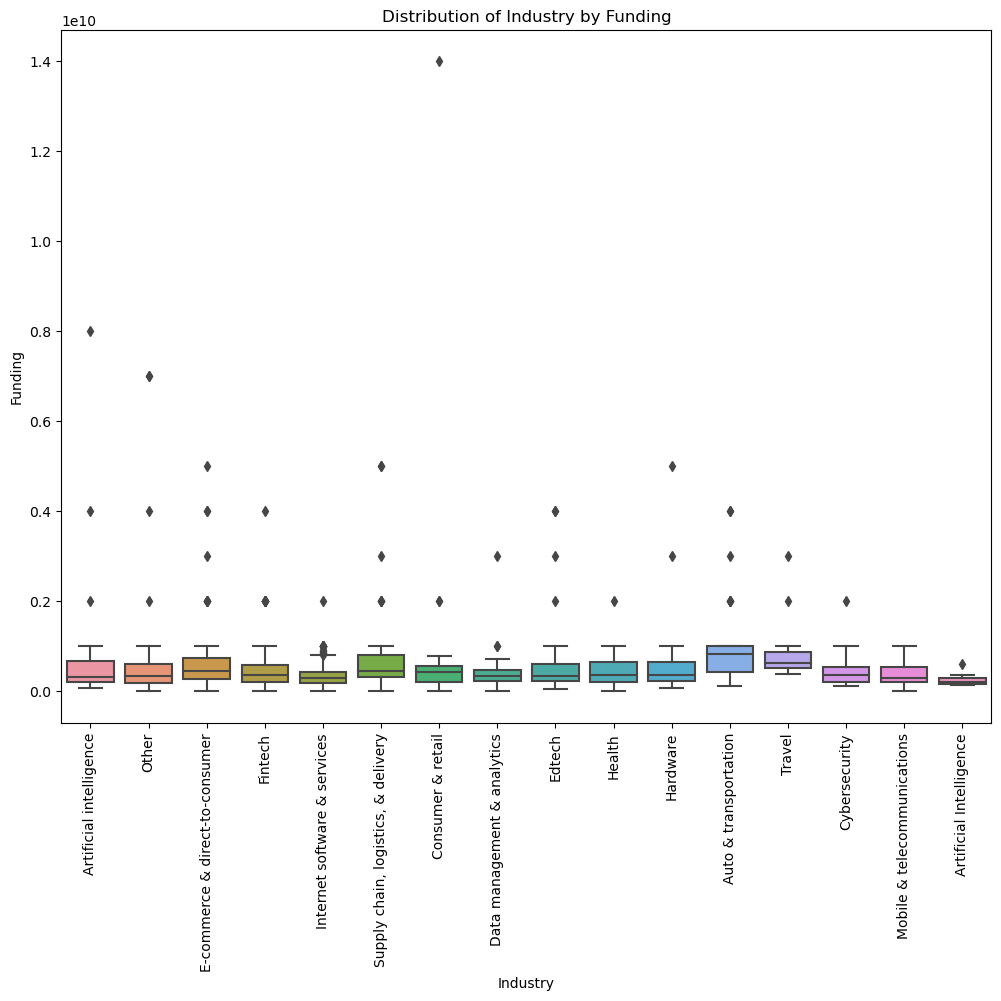

In [64]:
# visualizing of Industry by Funding
plt.figure(figsize = (12,9))
sns.boxplot(x = df['Industry'], y = df['Funding'], data = df)
plt.title('Distribution of Industry by Funding')
plt.xticks(rotation = 90, fontsize=10)
plt.show()

# Observation
Auto & transportation has the highest funding median value of 0.1Billion while the Artificial Intelligence records the lowest median value

In [65]:
# Calculate the number of investors for each company
df['Investor Count'] = df['Select Investors'].str.split(',').str.len()

# Sort the companies in descending order based on the number of investors
df_sorted = df.sort_values('Investor Count', ascending=False)

# Select the companies with the highest number of investors (e.g., top 5 companies)
top_companies = df_sorted.head(5)

# Perform a bivariate analysis using a cross-tabulation
cross_tab = pd.crosstab(top_companies['Select Investors'], top_companies['Company'])

# Print the cross-tabulation
print(cross_tab)

Company                                             Bytedance  Rappi  SVOLT  \
Select Investors                                                              
Andreessen Horowitz, Andreessen Horowitz, Insti...          0      0      0   
DST Global, Andreessen Horowitz, Sequoia Capita...          0      1      0   
IDG Capital, Bank Of China Group Investment,, S...          0      0      1   
Sequoia Capital China, SIG Asia Investments, Si...          1      0      0   
Sequoia Capital China, Sina Weibo, Kleiner Perk...          0      0      0   

Company                                             Skydio  Yixia  
Select Investors                                                   
Andreessen Horowitz, Andreessen Horowitz, Insti...       1      0  
DST Global, Andreessen Horowitz, Sequoia Capita...       0      0  
IDG Capital, Bank Of China Group Investment,, S...       0      0  
Sequoia Capital China, SIG Asia Investments, Si...       0      0  
Sequoia Capital China, Sina Weibo, Kle

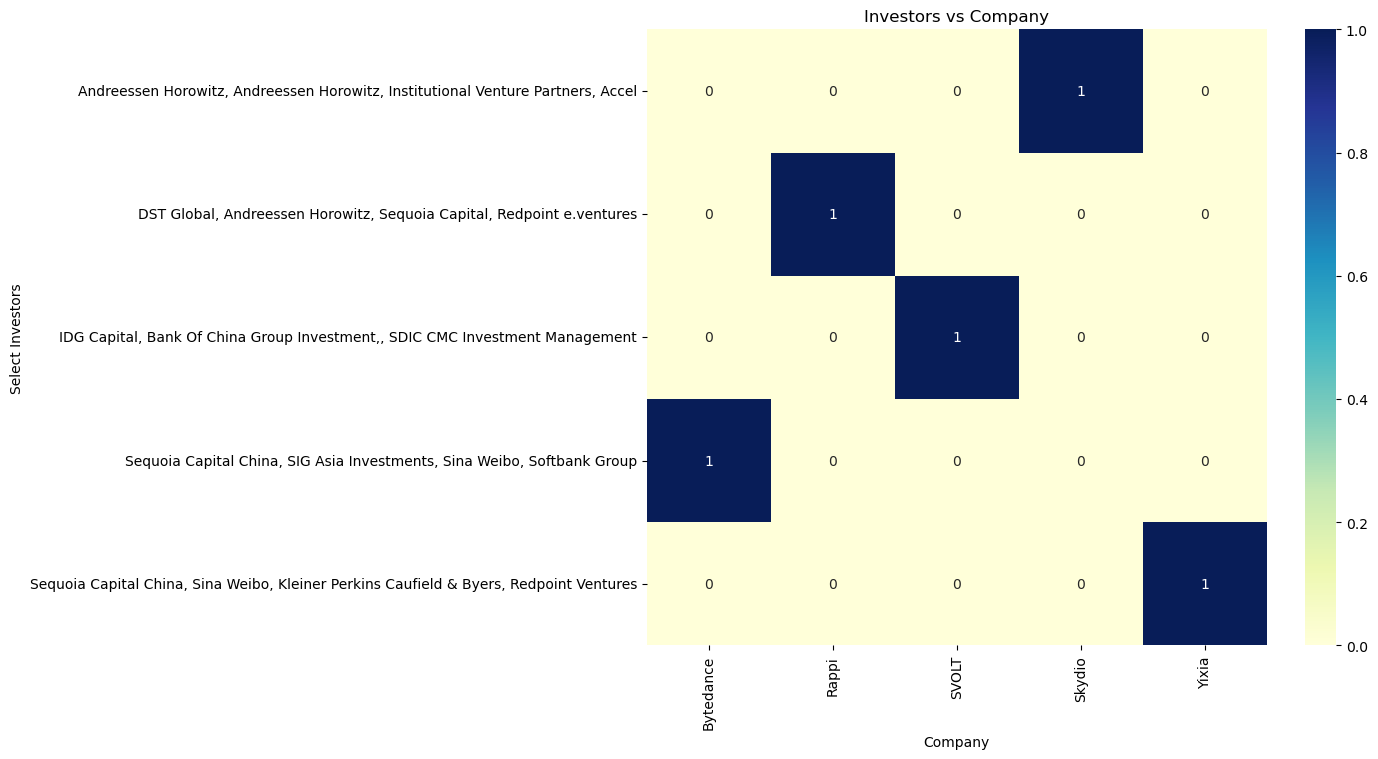

In [66]:
# A cross-tabulation of 'Select Investors' and 'Company' for top companies with the highest Investors
cross_tab = pd.crosstab(top_companies['Select Investors'], top_companies['Company'])

# Plot a heatmap of the cross-tabulation
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')
plt.title('Investors vs Company')
plt.xlabel('Company')
plt.ylabel('Select Investors')
plt.xticks(rotation=90)
plt.show()

### Observation
This compares and analyzes the distribution of select investors across different companies.
Each rows of the heatmap represent the select investors, while the columns represent the company names. 
Each cell in the heatmap corresponds to a specific combination of select investors and company. 
The color of each cell indicates the count of occurrences for that combination.

It is easy to identify patterns and relationships between the select investors and the companies; 
The darker shades of color(dark blue color), the higher the count, suggesting a stronger association between a specific select investor and a particular company. 
On the other hand, lighter shades(cream color) of color indicate a lower count, indicating a weaker or less frequent association.

The darker colors identify which select investors are more commonly associated with certain companies based on the intensity of color in the corresponding cells. 

In [67]:
# Top 3 Companies by Valuation
top3_comp = df.groupby('Company')['Valuation'].sum()[:3]
top3_comp

Company
1047 Games    2.000000e+09
1KMXC         1.000000e+09
1Password     7.000000e+09
Name: Valuation, dtype: float64

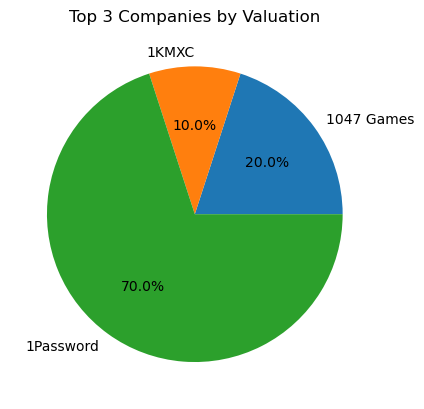

In [68]:
# Create a list of labels for the pie chart
labels = list(top3_comp.index)

# Create a list of values for the pie chart
values = list(top3_comp.values)

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%')
ax.set_title('Top 3 Companies by Valuation')

# Show the pie chart
plt.show()

In [69]:
# bottom 3 location by price
bot3_comp = df.groupby('Company')['Valuation'].sum().sort_values().tail(3)
bot3_comp

Company
SHEIN        1.000000e+11
SpaceX       1.000000e+11
Bytedance    1.800000e+11
Name: Valuation, dtype: float64

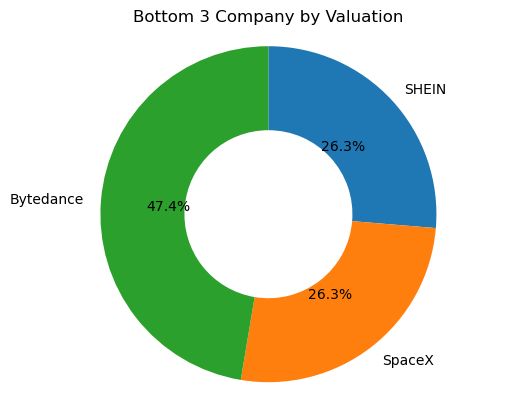

In [70]:
# Create a donut chart
fig, ax = plt.subplots()
ax.pie(bot3_comp, labels=bot3_comp.index, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops=dict(width=0.5))
ax.set_title('Bottom 3 Company by Valuation')
ax.axis('equal')

plt.show()

In [96]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."


In [24]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


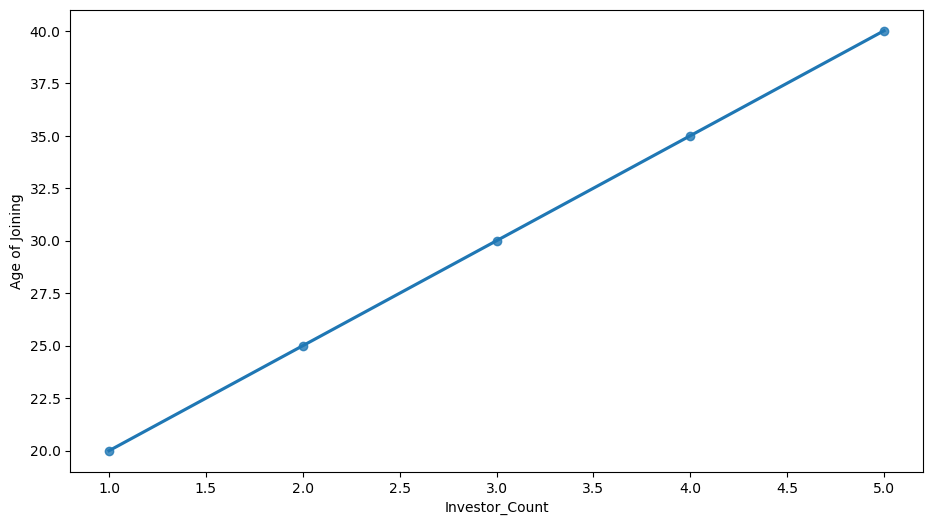

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# define your dataframe
df = pd.DataFrame({'Investor_Count': [1, 2, 3, 4, 5],
                   'Age of Joining': [20, 25, 30, 35, 40]})

# create the scatter chart
plt.figure(figsize=(11, 6))
sns.regplot(x='Investor_Count', y='Age of Joining', data=df)
plt.show()


### Observation
The higher the age of joining, the higher the number of investor count

## Multivariate Analysis

C:\Users\ifyp4\AppData\Local\Temp\ipykernel_1948\2867775964.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


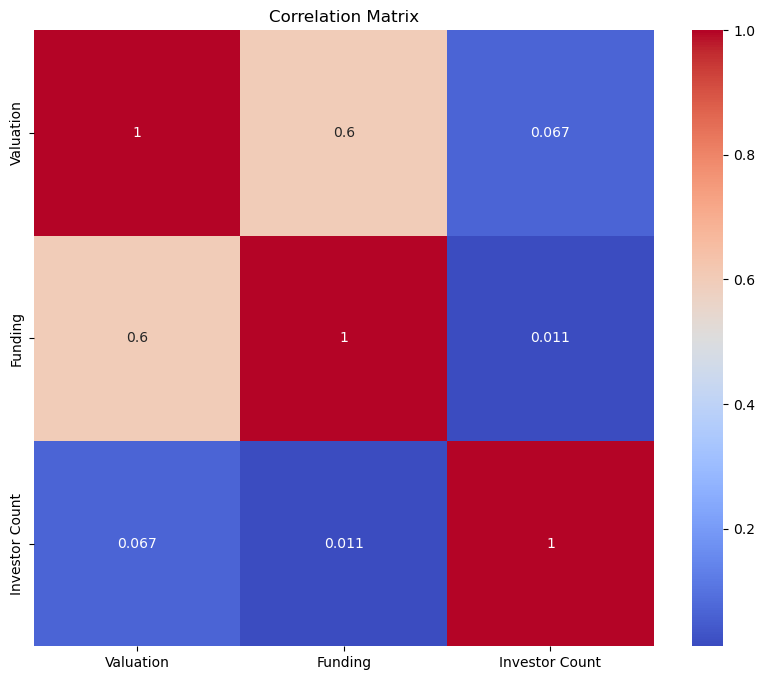

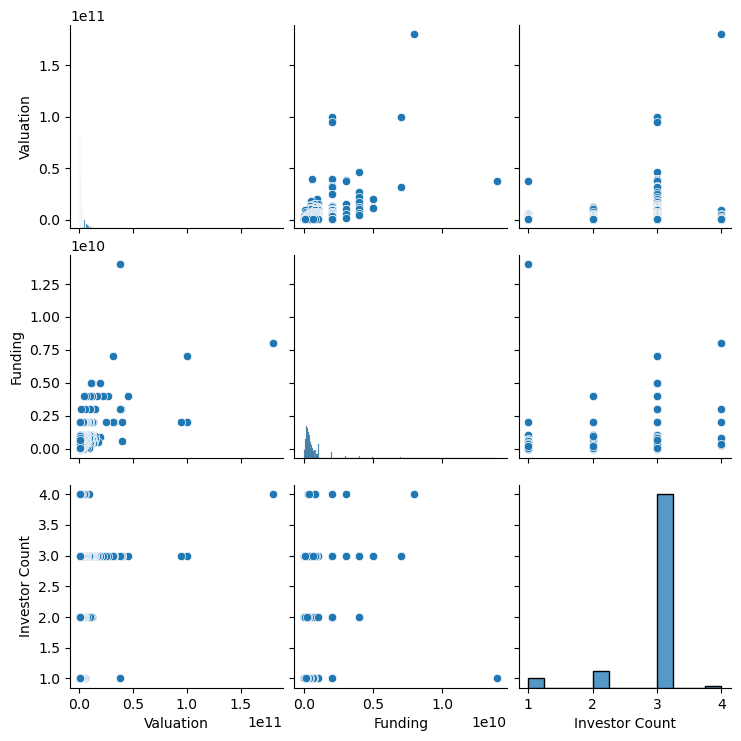

In [77]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Create scatter plots to visualize the relationships between variables
sns.pairplot(df)
plt.show()

### Observation
The visualization consists of two parts: 
- a correlation matrix heatmap and 
- a grid of scatter plots.

The above correlation matrix heatmap provides a visual representation of the relationships between multiple variables in the dataset.The color of each cell indicates the strength and direction of the correlation. The Darker colors (red & 1)indicate a stronger correlation, while lighter colors( light blue, 0.067, investor count and Valuation) indicate a weaker or no correlation. The numbers within each cell represent the correlation coefficient value.


These visualizations allow you to explore and understand the relationships between multiple variables in your dataset. You can identify which variables are positively or negatively correlated, and visualize how they interact with each other through the scatter plots. This helps in gaining insights and making informed decisions based on the observed relationships.

In [27]:
# Get the numerical values of the dataset
num_values = df.describe()

# Display the numerical values
num_values

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


<Figure size 1200x800 with 0 Axes>

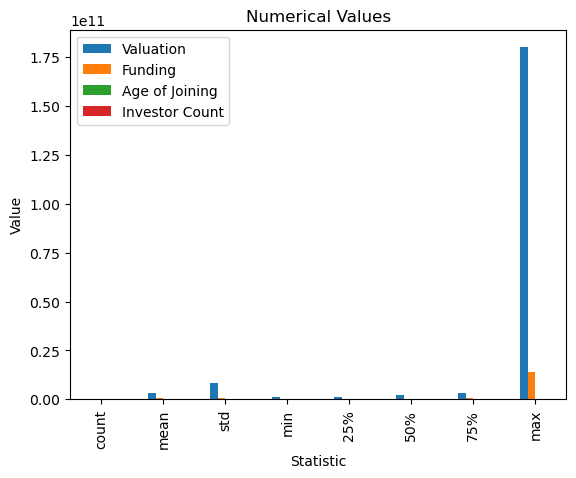

In [94]:
# Create a bar plot
plt.figure(figsize=(12, 8))
num_values.plot(kind='bar')
plt.title('Numerical Values')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.show()

### Observation
For each company, this bar plot displays the following summary statistics:

- The bottom of each bar represents the minimum valuation value.
- The top of each bar represents the maximum valuation value.
- The vertical line inside each bar represents the median valuation value.
- The bottom edge of the box represents the 25th percentile valuation value.
- The top edge of the box represents the 75th percentile valuation value.
- This visualization allows for a quick comparison of the valuation distribution across different companies. It provides an overview of the minimum, maximum, median, and quartiles of the valuation values for each company.

This bar plot can help identify any outliers or differences in the valuation distributions among the companies. It provides easy comparison between the companies, as the bars are placed side by side.

The title of the plot, "Valuation Summary per Company", provides a clear description of the information being presented. The x-axis label, "Company", and the y-axis label, "Valuation", provide context for the data being plotted.



### Which unicorn companies have had the biggest return on investment?

In [8]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."


In [10]:
# Calculate the Return on Investment(ROI) for each company
df['ROI'] = (df['Valuation'] - df['Funding']) / df['Funding']
df['ROI']

0       21.500000
1       13.285714
2       49.000000
3       46.500000
4       10.500000
          ...    
1069     1.638522
1070     0.010101
1071    11.500000
1072     0.262626
1073     0.612903
Name: ROI, Length: 1074, dtype: float64

In [25]:
# Get the top 10 companies with the most ROI
top_10_companies = df.head(10)
top_10_companies

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,ROI
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",21.500000
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",13.285714
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",49.000000
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",46.500000
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",10.500000
5,Canva,4.000000e+10,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,5.720000e+08,"Sequoia Capital China, Blackbird Ventures, Mat...",68.930070
6,Checkout.com,4.000000e+10,2019-05-02,Fintech,London,United Kingdom,Europe,2012,2.000000e+09,"Tiger Global Management, Insight Partners, DST...",19.000000
7,Instacart,3.900000e+10,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,3.000000e+09,"Khosla Ventures, Kleiner Perkins Caufield & By...",12.000000
8,JUUL Labs,3.800000e+10,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,1.400000e+10,Tiger Global Management,1.714286
9,Databricks,3.800000e+10,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,3.000000e+09,"Andreessen Horowitz, New Enterprise Associates...",11.666667


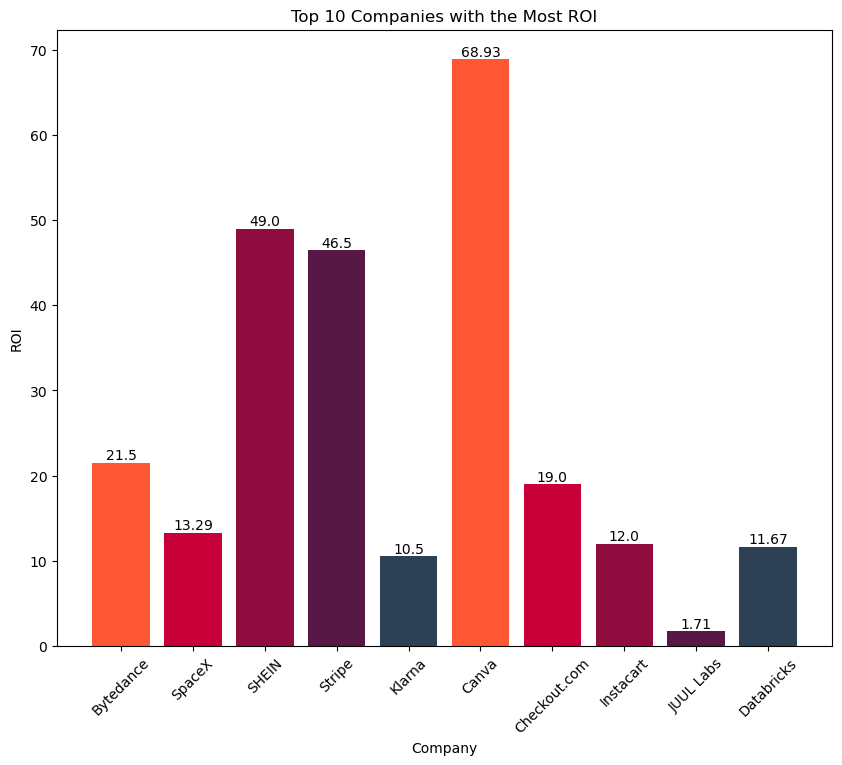

In [27]:
# Create a bar chart to visualize the ROI for the top 5 companies
plt.figure(figsize = (10,8))
plt.bar(top_10_companies['Company'], top_10_companies['ROI'], color=['#FF5733', '#C70039', '#900C3F', '#581845', '#2E4053'])
for i, val in enumerate(top_10_companies['ROI']):
    plt.text(i, val, str(round(val, 2)), ha='center', va='bottom')

plt.xlabel('Company')
plt.ylabel('ROI')
plt.title('Top 10 Companies with the Most ROI')
plt.xticks(rotation=45)
plt.show()

# Observattion
The bar chart above indicates that Canva had the highest ROI value of 68.93, while JUUL Labs had the lowest ROI value of 1.71. This suggests that Canva has a larger customer base as a designing application compared to JUUL Labs. To improve their ROI, JUUL Labs could consider developing more humanitarian-based solutions and seek support from the government as an investment. They could also provide a safe space for other investors to encourage them to invest.

### How long does it usually take for a company to become a unicorn? Has it always been this way?

In [5]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."


In [25]:
# Convert the 'Year Founded' column to datetime
df['Year Founded'] = pd.to_datetime(df['Year Founded'])

# Calculate the time taken for a company to become a unicorn
df['Time_to_Unicorn'] = df['Valuation'].notnull().astype(int) * (df['Valuation'].notnull().cumsum()) - df['Year Founded'].rank(method='min')


# Calculate the median time taken for a company to become a unicorn
median_time_to_unicorn = df['Time_to_Unicorn'].median()

# Group the data by year and calculate the median time taken for a company to become a unicorn each year
yearly_median_time_to_unicorn = df.groupby(df['Year Founded'].dt.year)['Time_to_Unicorn'].median()
yearly_median_time_to_unicorn

Year Founded
1919     189.0
1979     372.0
1984     697.0
1990     837.0
1991       7.0
1992     372.0
1993    1037.0
1994     116.5
1995     276.5
1996      68.0
1997    1054.0
1998     149.0
1999     595.5
2000     581.0
2001     530.0
2002     292.0
2003     185.5
2004     372.5
2005     435.5
2006     378.0
2007     476.0
2008     255.0
2009     493.0
2010     366.5
2011     339.5
2012     144.0
2013      50.0
2014      87.0
2015     -53.0
2016    -202.5
2017    -315.0
2018    -340.0
2019    -327.0
2020    -279.0
2021    -288.0
Name: Time_to_Unicorn, dtype: float64

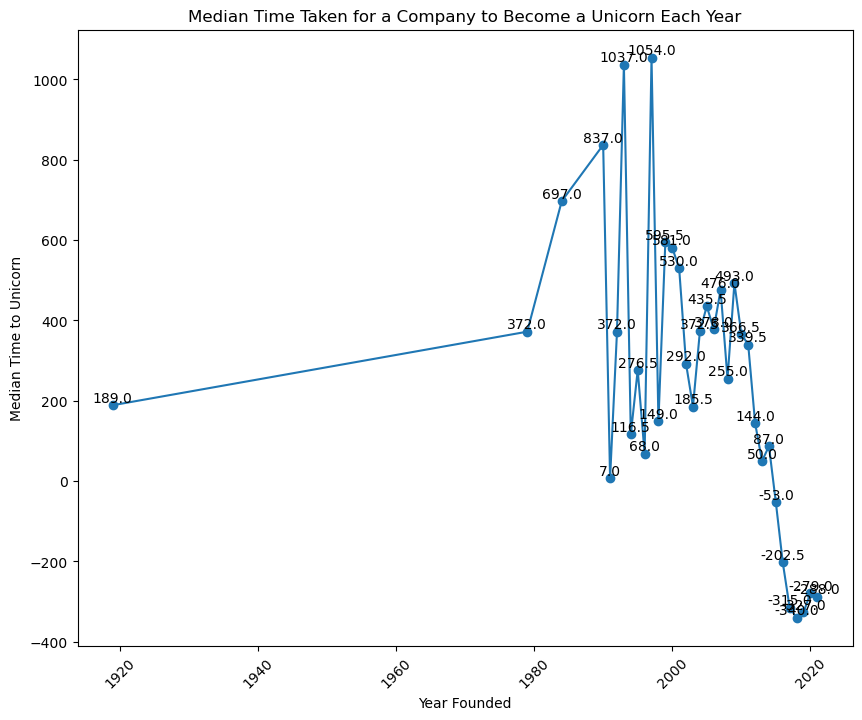

In [26]:
# Create a line plot to visualize the median time taken for a company to become a unicorn each year
plt.figure(figsize = (10,8))
plt.plot(yearly_median_time_to_unicorn.index, yearly_median_time_to_unicorn.values, marker='o')
plt.xlabel('Year Founded')
plt.ylabel('Median Time to Unicorn')
plt.title('Median Time Taken for a Company to Become a Unicorn Each Year')
plt.xticks(rotation=45)
# Add data labels to each data point
for x, y in zip(yearly_median_time_to_unicorn.index, yearly_median_time_to_unicorn.values):
    plt.text(x, y, str(round(y, 2)), ha='center', va='bottom')
plt.show()

In [31]:
print(f"The median time taken for a company to become a unicorn is {median_time_to_unicorn:.2f} years.")

The median time taken for a company to become a unicorn is 29.50 years.


### Observation 
The x-axis reveals the year in which these remarkable companies were founded, while the y-axis showcases the median time taken for them to achieve unicorn status. The markers and label point out the exact median year for a company to be a unicorn, and shows how far each company has come through hard work and dedication to reach this far. on the other hand, it takes 29.50 median time for a company to be a unicorn.
Overall, this visualization effectively communicates the median time taken for a company to become a unicorn each year. The combination of the line plot, data points, and data labels provides a comprehensive and visually appealing representation of the trends and patterns in the unicorn landscape over time.

In [29]:
 # Compare the yearly median times to the overall median time
yearly_vs_overall_comparison = yearly_median_time_to_unicorn - median_time_to_unicorn
yearly_vs_overall_comparison

Year Founded
1919     159.5
1979     342.5
1984     667.5
1990     807.5
1991     -22.5
1992     342.5
1993    1007.5
1994      87.0
1995     247.0
1996      38.5
1997    1024.5
1998     119.5
1999     566.0
2000     551.5
2001     500.5
2002     262.5
2003     156.0
2004     343.0
2005     406.0
2006     348.5
2007     446.5
2008     225.5
2009     463.5
2010     337.0
2011     310.0
2012     114.5
2013      20.5
2014      57.5
2015     -82.5
2016    -232.0
2017    -344.5
2018    -369.5
2019    -356.5
2020    -308.5
2021    -317.5
Name: Time_to_Unicorn, dtype: float64

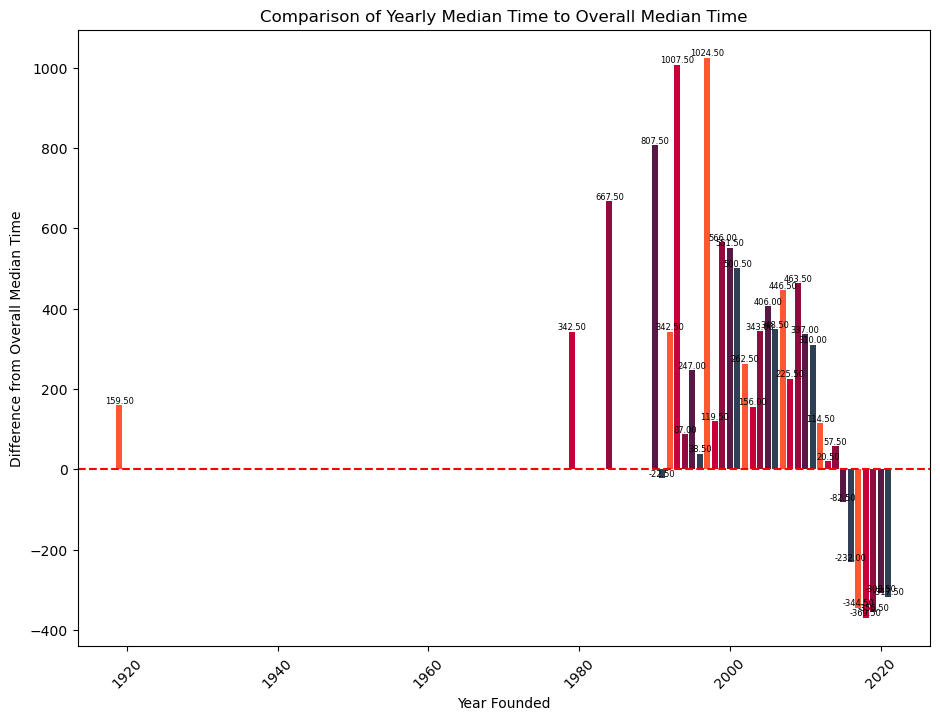

In [37]:
# Visualize the comparison using a bar plot
plt.figure(figsize=(11, 8))
bars = plt.bar(yearly_vs_overall_comparison.index, yearly_vs_overall_comparison.values, color=['#FF5733', '#C70039', '#900C3F', '#581845', '#2E4053'])
plt.xlabel('Year Founded')
plt.ylabel('Difference from Overall Median Time')
plt.title('Comparison of Yearly Median Time to Overall Median Time')
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference

# Add data labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.2f}', ha='center', va='bottom', fontsize = 6)

plt.show()

### Observation
The bars represent the difference between each year's median time and the overall median time, with positive values indicating that the yearly median time is greater than the overall median time, and negative values indicating that the yearly median time is lower, probably due to the pandemic in 2020 that forced many stsrt ups to shut down. The data labels on top of each bar provide precise information about the difference between each year's median time and the overall median time. The labels are small in size, ensuring they don't overpower the plot but are still easily readable. They provide a numerical value for each bar, allowing for a quick comparison between the years.
The horizontal line at y=0 serves as a reference point, making it easy to identify which years have median times above or below the overall median time. Any bars above the line indicate that the corresponding year's median time is greater than the overall median time, while bars below the line indicate a lower median time.
Overall, this visualization effectively highlights the differences in median times across different years, providing a clear visual representation of how each year compares to the overall median time. The color scheme, data labels, and reference line all contribute to making the plot easily interpretable and informative. 

### Which countries have the most unicorns? Are there any cities that appear to be industry hubs?

In [12]:
# This is to group the dataset by 'Country' and then count the number of unicorns in each country in descending order
country_counts = df['Country'].value_counts().sort_values(ascending=False)
country_counts

United States           562
China                   173
India                    65
United Kingdom           43
Germany                  26
France                   24
Israel                   20
Canada                   19
Brazil                   16
Singapore                12
South Korea              12
Australia                 8
Netherlands               6
Sweden                    6
Mexico                    6
Indonesia                 6
Hong Kong                 6
Switzerland               5
Japan                     5
Ireland                   5
Finland                   4
Norway                    4
Spain                     3
Belgium                   3
Turkey                    3
United Arab Emirates      3
South Africa              2
Philippines               2
Thailand                  2
Estonia                   2
Vietnam                   2
Austria                   2
Colombia                  2
Denmark                   2
Chile                     2
Bahamas             

In [13]:
# Get the top 10 countries with the most unicorns
top10_countries = country_counts.head(10)
top10_countries

United States     562
China             173
India              65
United Kingdom     43
Germany            26
France             24
Israel             20
Canada             19
Brazil             16
Singapore          12
Name: Country, dtype: int64

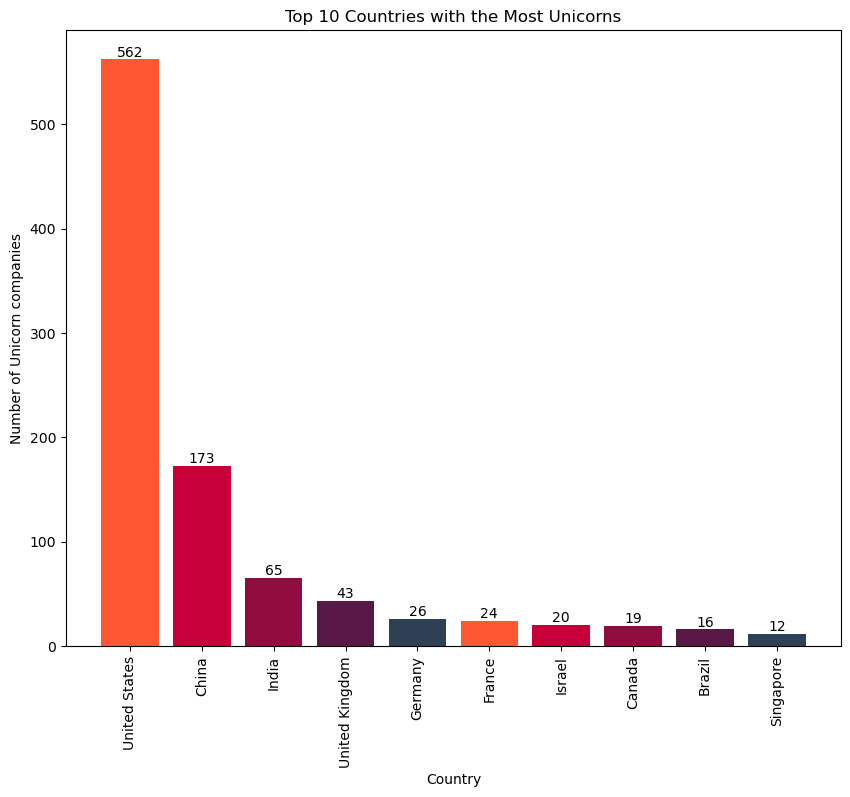

In [14]:
# Plotting the top 10 countries
plt.figure(figsize=(10, 8))
plt.bar(top10_countries.index, top10_countries.values, color =['#FF5733', '#C70039', '#900C3F', '#581845', '#2E4053'])
plt.xlabel('Country')
plt.ylabel('Number of Unicorn companies')
plt.title('Top 10 Countries with the Most Unicorns')
plt.xticks(rotation=90)
for i, count in enumerate(top10_countries.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

# Observation
Using the chart above, United states appears to be the topmost country with the highest number of unicorns with ta value of 526, followed by China with a value of 173 and it follows suit until the Singapore, which records the lowest number of unicorns with a value of 12.

### Are there any cities that appear to be industry hubs?

In [36]:
# Group data by city and count the number of unicorn companies in each city
city_counts = df['City'].value_counts()

# Filter cities with a high number of unicorn companies (e.g., top 10 cities)
high_unicorn_cities = city_counts[city_counts >= 10]

# Print the cities that appear to be industry hubs
print("Cities that appear to be industry hubs:")
print(high_unicorn_cities)

Cities that appear to be industry hubs:
San Francisco    152
New York         103
Beijing           63
Shanghai          44
London            34
Bengaluru         29
Shenzhen          19
Paris             19
Palo Alto         18
Berlin            17
Boston            16
Hangzhou          16
Chicago           16
Mountain View     16
Tel Aviv          11
San Mateo         11
Sao Paulo         11
Seoul             10
Redwood City      10
Name: City, dtype: int64


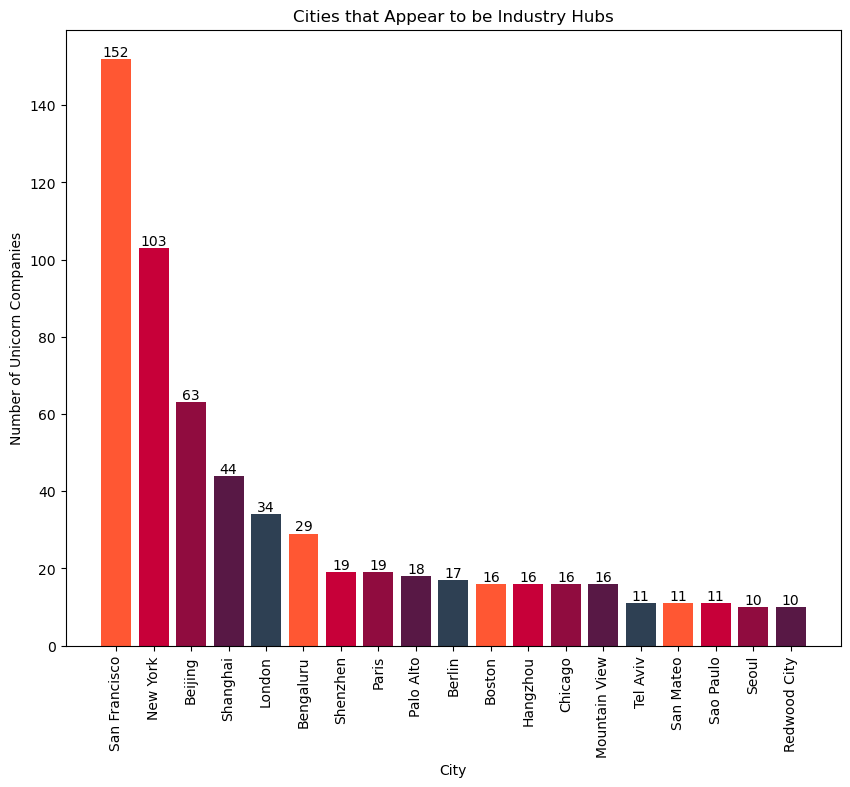

In [37]:
# Plot a bar graph for the cities that appear to be industry hubs
plt.figure(figsize = (10,8))
plt.bar(high_unicorn_cities.index, high_unicorn_cities.values, color=['#FF5733', '#C70039', '#900C3F', '#581845', '#2E4053'])
plt.xlabel('City')
plt.ylabel('Number of Unicorn Companies')
plt.title('Cities that Appear to be Industry Hubs')
plt.xticks(rotation=90)
for i, count in enumerate(high_unicorn_cities.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

### Observation
the bar chat above also shws the cities with the most Industrial hubs. logically since United States recorded the highest unicorns, it just makes sense to also have San Francisco and New York record the highest number of industrial hubs with values 152 and 103 respectively. Whereas China follows suit as Beijing and Shanghai also records in third and fourth place with values of 63 and 44 respectively. On the other hand, Redwood City records the lowest Industrial hub with a value of 10. 
There should be a market survey to findthe resason for recording the lowest values and encouragement of investors by the Government to invest in these start up unicorns with proper returns policies and working environment so as to promote the growth of unicorn companies.

### Which investors have funded the most unicorns?

In [38]:
investor_counts = df['Select Investors'].value_counts()
investor_counts

Sequoia Capital                                             3
Pelion Venture Partners, Foundation Capital, Thoma Bravo    2
Insight Partners, Sequoia Capital, Index Ventures           2
Speedinvest, Valar Ventures, Uniqa Ventures                 2
SoftBank Group                                              2
                                                           ..
Trustbridge Partners, IDG Capital, Sequoia Capital China    1
K2VC, Lightspeed China Partners, Sky9 Capital               1
Automobile Industry Guidance Fund                           1
Trustbridge Partners, Hony Capital, IDG Capital             1
Novator Partners, True, Causeway Media Partners             1
Name: Select Investors, Length: 1058, dtype: int64

In [39]:
 # counts the top 5 investors who have funded the unicorns
print(investor_counts.head(5)) 

Sequoia Capital                                             3
Pelion Venture Partners, Foundation Capital, Thoma Bravo    2
Insight Partners, Sequoia Capital, Index Ventures           2
Speedinvest, Valar Ventures, Uniqa Ventures                 2
SoftBank Group                                              2
Name: Select Investors, dtype: int64


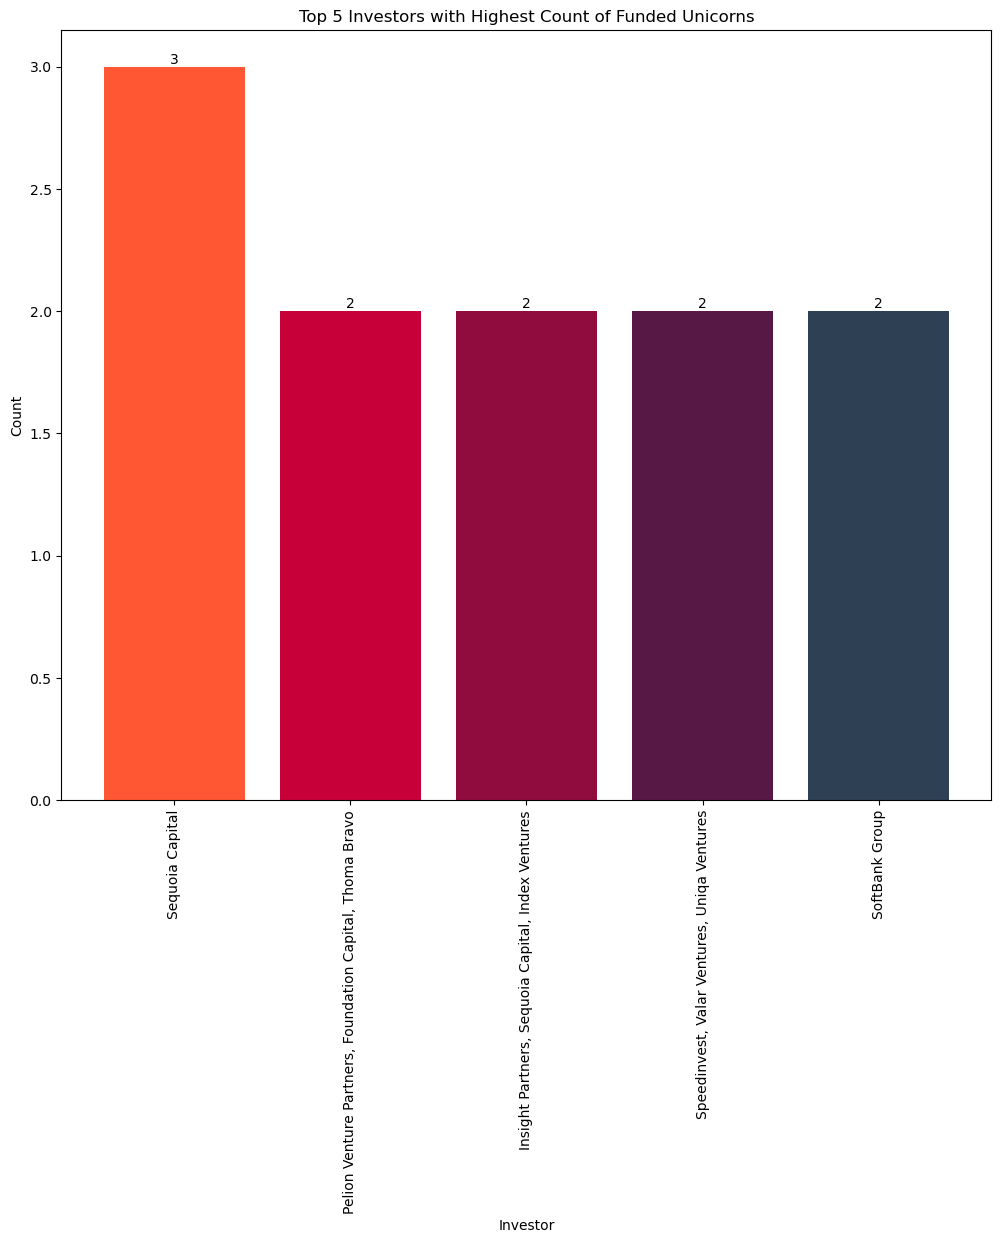

In [40]:
# Plotting the top 5 investors on a bar chart
plt.figure(figsize=(12, 10))
plt.bar(investor_counts.head(5).index, investor_counts.head(5).values, color=['#FF5733', '#C70039', '#900C3F', '#581845', '#2E4053'])
plt.xlabel('Investor')
plt.ylabel('Count')
plt.title('Top 5 Investors with Highest Count of Funded Unicorns')
plt.xticks(rotation=90)
for i, count in enumerate(investor_counts.head(5).values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

### Observation
Sequioa Capital appears to have funded the most unicorns and that makes them the top investor among others. the remaining 4 investors from the barchart above have the same number of investments. This is good because there is competeition for returns by Investors and so they must be encouraged with improved and irresistible Investment policies help move the number of investors up.

## Findings
- It is easier to determine which sectors unicorn companies need to focus on and which regions have the highest concentration of unicorns, indicating favourable grounds for potential investors to pay more attention to.
- It is now easy to identify common success factors among unicorn companies. This finding can provide insights into the key attributes, strategies, or characteristics that contribute to a company's ability to achieve unicorn status.
- After thorough Analysis of the Dataset, i noticed that there is a positive distribution of unicorn companies across different industry sectors and it makes it easy to identify which sectors are most successful in producing unicorns and potentially identify emerging sectors with high growth potential.
- It is easier to know which areas unicorn companies need attention and which areas have the highest concentration of unicorns, indication favorable grounds for potential investors to give more attention to. 
- It is possible to identify the longevity of unicorn companies. This information can help understand whether unicorns tend to sustain their valuation over time or experience fluctuations in their market value.
- In summary, there is a promising growth in Unicorn Companies after the pandemic as more strategic ways have been implemented to promote business.

# My recommendations 
- Foster a strong company culture: Cultivate a positive and inclusive work environment that values collaboration, innovation, and employee well-being. A strong company culture attracts and retains top talent, fosters creativity, and promotes a sense of purpose and dedication among employees.

- Prioritize talent acquisition: Identify and recruit skilled and diverse professionals who align with the company's vision and values. Implement effective talent retention strategies such as competitive compensation packages, professional development opportunities, and a supportive work-life balance.

- Focus on innovation and adaptability: Encourage a culture of continuous learning and innovation within the organization. Foster an environment where employees are encouraged to think outside the box, experiment, and adapt to changing market trends and customer needs.

- Build strong partnerships and networks: Collaborate with strategic partners, investors, and industry experts to leverage their knowledge, resources, and networks. Building strong relationships can lead to valuable insights, access to new markets, and potential business opportunities.

- Develop a robust marketing and branding strategy: Invest in building a strong brand identity and effective marketing campaigns to create awareness and attract customers. Utilize digital marketing channels, social media, and content marketing to reach a wider audience and differentiate the company from competitors.

- Maintain a customer-centric approach: Continuously gather customer feedback and insights to understand their needs, preferences, and pain points. Use this information to improve products, services, and customer experiences, ensuring that the company remains customer-focused.

- Embrace technology and digital transformation: Stay updated with technological advancements and leverage them to streamline operations, enhance productivity, and improve customer experiences. Embracing digital transformation can lead to increased efficiency, scalability, and competitive advantage.

- Develop a sustainable growth strategy: Focus on long-term growth and sustainability rather than short-term gains. Balance expansion with financial stability, ensuring that the company's growth is supported by strong financial management and a sustainable business model.

- Engage in corporate social responsibility: Demonstrate a commitment to social and environmental causes by engaging in corporate social responsibility initiatives. This can enhance the company's reputation, attract socially conscious customers and investors, and contribute to positive societal impact.

- Foster a culture of learning and adaptability: Encourage a growth mindset and a willingness to learn from failures and setbacks. Embrace a culture of continuous improvement and adaptability to navigate challenges and seize new opportunities.

Implementing these suggestions can contribute to the growth, success, and sustainability of unicorn companies, enabling them to thrive in these competitive times.